In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

### Segmentación de clientes 👩🤠🧑

El siguiente conjunto de datos consiste en información sobre el comportamiento de compra de 2,000 individuos de una determinada área al entrar en una tienda física de bienes de consumo rápido. Todos los datos se han recopilado a través de las tarjetas que utilizan al momento de pagar. Los datos han sido preprocesados y no hay valores faltantes. Además, el volumen del conjunto de datos se ha limitado y anonimizado para proteger la privacidad de los clientes.

Columnas del conjunto de datos:

- **Sex**: género.
        0: masculino,
        1: femenino.
- **Marital status**: Estado civil de un cliente.
        0: soltero,
        1: no soltero (divorciado/separado/casado/viudo).
- **Age**: Edad del cliente en años. Valor mínimo: 18, Valor máximo: 78.
- **Education**: Nivel educativo del cliente.
        0: otro/desconocido,
        1: escuela secundaria,
        2: universidad,
        3: posgrado.
- **Income**: Ingreso anual autoreportado en dólares estadounidenses del cliente. Valor mínimo: 35,832, Valor máximo: 309,364.
- **Occupation**: Categoría de la ocupación del cliente.
        0: desempleado/no calificado,
        1: empleado calificado/funcionario,
        2: administración/autónomo/empleado altamente calificado/oficial.
- **Settlement size**: Tamaño de la ciudad donde vive el cliente.
        0: ciudad pequeña,
        1: ciudad mediana,
        2: gran ciudad.

A continuación, Aplique el algoritmo de K-means para realizar una **segmentación de clientes** (**customer segmentation**), esta es una estrategia y técnica en marketing y análisis de datos que implica dividir una base de clientes en grupos más pequeños y homogéneos según características y comportamientos similares. El objetivo principal de la segmentación de clientes es comprender mejor a los diferentes grupos de clientes para poder adaptar estrategias y enfoques de marketing específicos a cada segmento.

In [2]:
customer = pd.read_csv('1_datos/customer_data.csv')
customer.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [6]:
customer = customer.drop(['ID'], axis=1)
customer.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [7]:
customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


> Cuando estamos aplicando kmeans a datos del mundo real usando la métrica de distancia euclídea, queremos asegurarnos que las características se miden en la misma escala por lo que es necesario escalar los datos. Utilice el escalado _MinMax_

In [20]:
#Escalamos los datos usando min-max
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(customer)
#convertimos a un array de pandas
X = np.array(X)
X


array([[0.        , 0.        , 0.84482759, ..., 0.32478101, 0.5       ,
        1.        ],
       [1.        , 1.        , 0.06896552, ..., 0.42021043, 0.5       ,
        1.        ],
       [0.        , 0.        , 0.53448276, ..., 0.19514353, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.22413793, ..., 0.18487051, 0.        ,
        0.        ],
       [1.        , 1.        , 0.10344828, ..., 0.22716172, 0.        ,
        0.        ],
       [0.        , 0.        , 0.12068966, ..., 0.11912317, 0.        ,
        0.        ]])

Grafique el valor de silueta en función de _k_ y el Diagrama de Silueta para obtener un valor óptimo de _k_.

Silhouette scores: [np.float64(0.3908135700315586), np.float64(0.35584584550352044), np.float64(0.4023684317095256), np.float64(0.4224716320686519), np.float64(0.4373042442245209), np.float64(0.4360378180009978), np.float64(0.4298222572289267), np.float64(0.4191798750573875)]


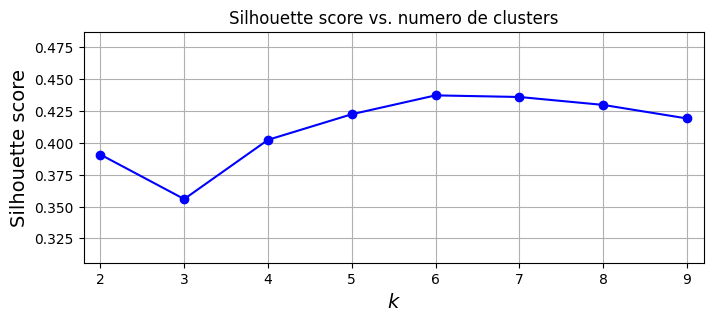

In [33]:
# modelos de kmeans
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=1).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

# Valores de silueta
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]  # por lo menos 2 clusters

# valores de silueta por cada cluster
print("Silhouette scores:", silhouette_scores)

# Graficamos el valor de la silueta en función del número de clusters
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title("Silhouette score vs. numero de clusters")
plt.axis([1.8, 9.2, min(silhouette_scores) - 0.05, max(silhouette_scores) + 0.05])
plt.grid(True)
plt.show()

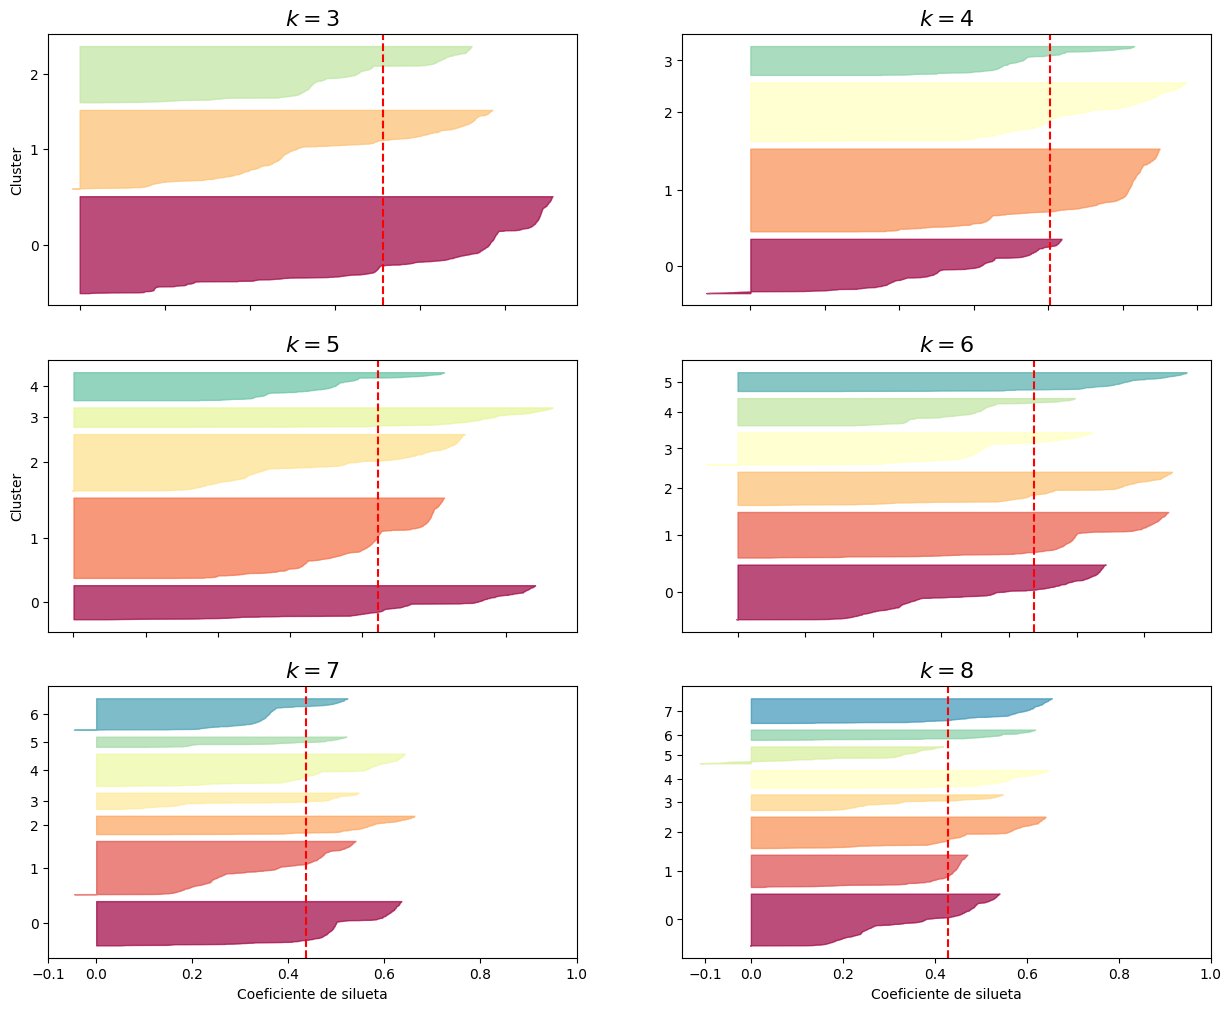

In [38]:
#diagrama de silueta
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(15, 12))  # Adjusted figure size

for k in (3, 4, 5, 6, 7, 8):
    plt.subplot(3, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_ #etiquetas de cada instancia de X
    silhouette_coefficients = silhouette_samples(X, y_pred) #coeficientes para cada una de las instancias en X

    padding = len(X) // 30

    pos = padding
    ticks = []
    #Grafico los coeficientes de silueta por cada cluster
    for i in range(k): #i = 0,1,2..
        coeffs = silhouette_coefficients[y_pred == i] #coeficientes correspondientes a un cluster específico
        coeffs.sort()

        color = mpl.cm.Spectral(i / k) #colormap
        plt.fill_betweenx(y = np.arange(pos, pos + len(coeffs)), x1=0, x2=coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (7, 8):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Coeficiente de silueta")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Una vez agrupadas las instancias en _k_ clusters, cree un nuevo dataframe agregando como columna adicional, las etiquetas otorgadas por el modelo de _k-means_.
Ahora se podrían filtrar los datos de cada cluster para analizar las características específicas de cada grupo. Sin embargo, se puede utilizar un modelo adicional para ayudar con esta tarea.

Utilice un *árbol de decisión* como una representación visual para la toma de decisiones basadas en las características de los clientes y asignarlos a diferentes segmentos o agrupamientos (*clusters*). Utilice el coeficiente de gini, limite la profundidad del árbol a 4 y establezca un número mínimo de 5 instancias en un nodo hoja.

**Clasifique los clientes y escriba las características de los clientes encontradas en cada cluster.**

In [44]:
#Creamos un df con los datos etiquetados con el valor optimo de k encontrado
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X)
customer['cluster'] = kmeans.labels_
customer.head()



,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,2
1,1,1,22,1,150773,1,2,4
2,0,0,49,1,89210,0,0,3
3,0,0,45,1,171565,1,1,0
4,0,0,53,1,149031,1,1,0


In [50]:
X = customer.drop('cluster', axis=1)
y = customer['cluster']

tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

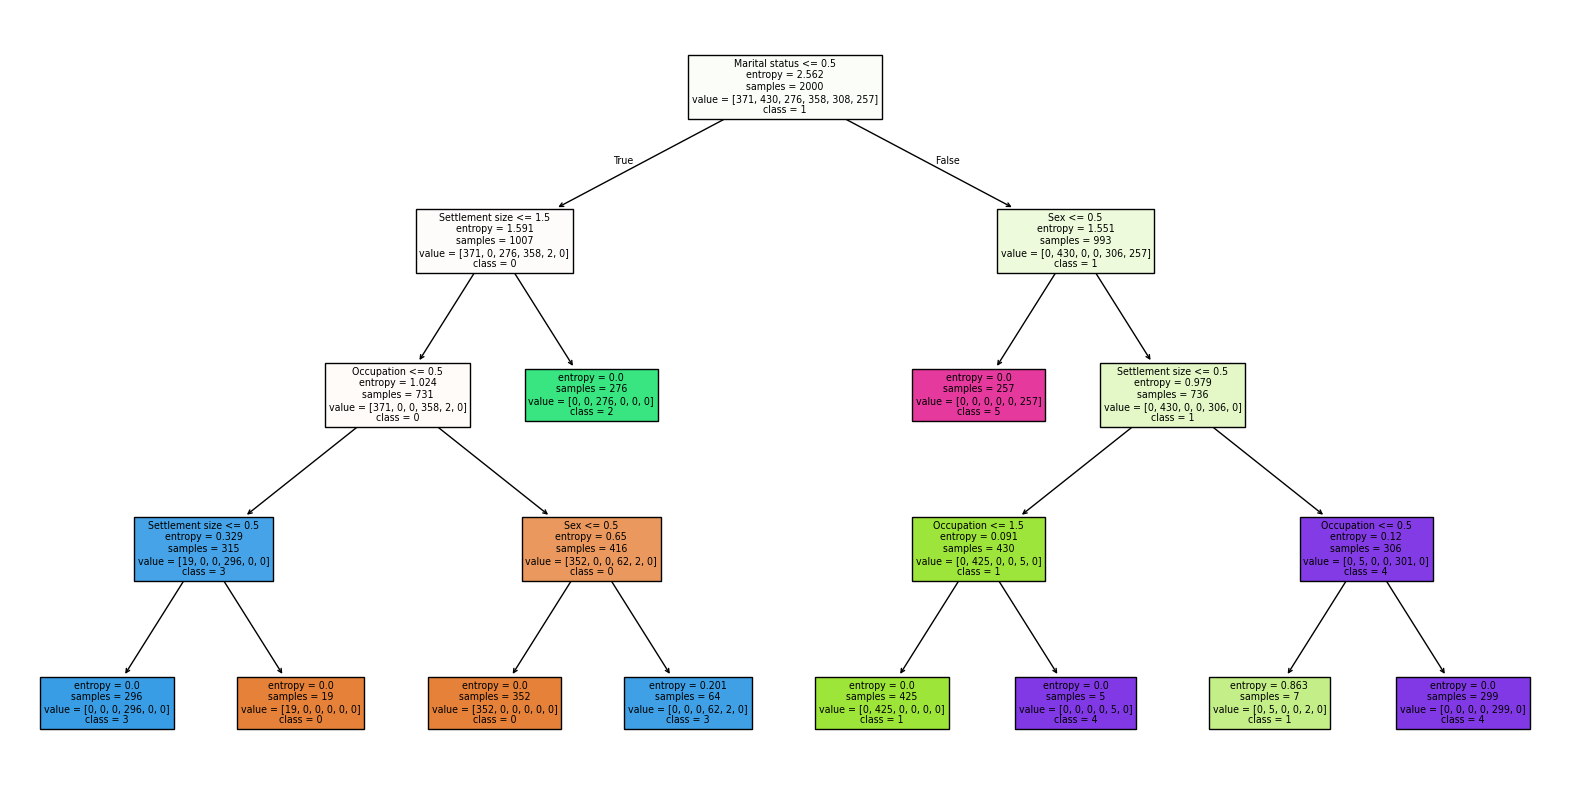

In [51]:
# Utilice un *árbol de decisión* como una representación visual para la toma de decisiones basadas en las características de los clientes y asignarlos a diferentes segmentos o agrupamientos (*clusters*). Utilice el coeficiente de gini, limite la profundidad del árbol a 4 y establezca un número mínimo de 5 instancias en un nodo hoja.
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=customer.columns, class_names=['0', '1', '2', '3', '4', '5'])   
plt.show()



Para clasificar los clientes, nos fijamos en la característica evaluada en cada nodo. Si se cumple lo que se está evaluando, descendemos al nodo izquierdo, de lo contrario descendemos al nodo derecho, así hasta alcanzar un nodo hoja .

- Cluster 1 -->
- Cluster 2 -->

...
